In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=4,min_samples_split=5,min_samples_leaf=2,random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Model Evaluation Metrics:")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)

Model Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.9386

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.91      0.92        43
      benign       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



<ipython-input-4-c38a7202f34f>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha='left')


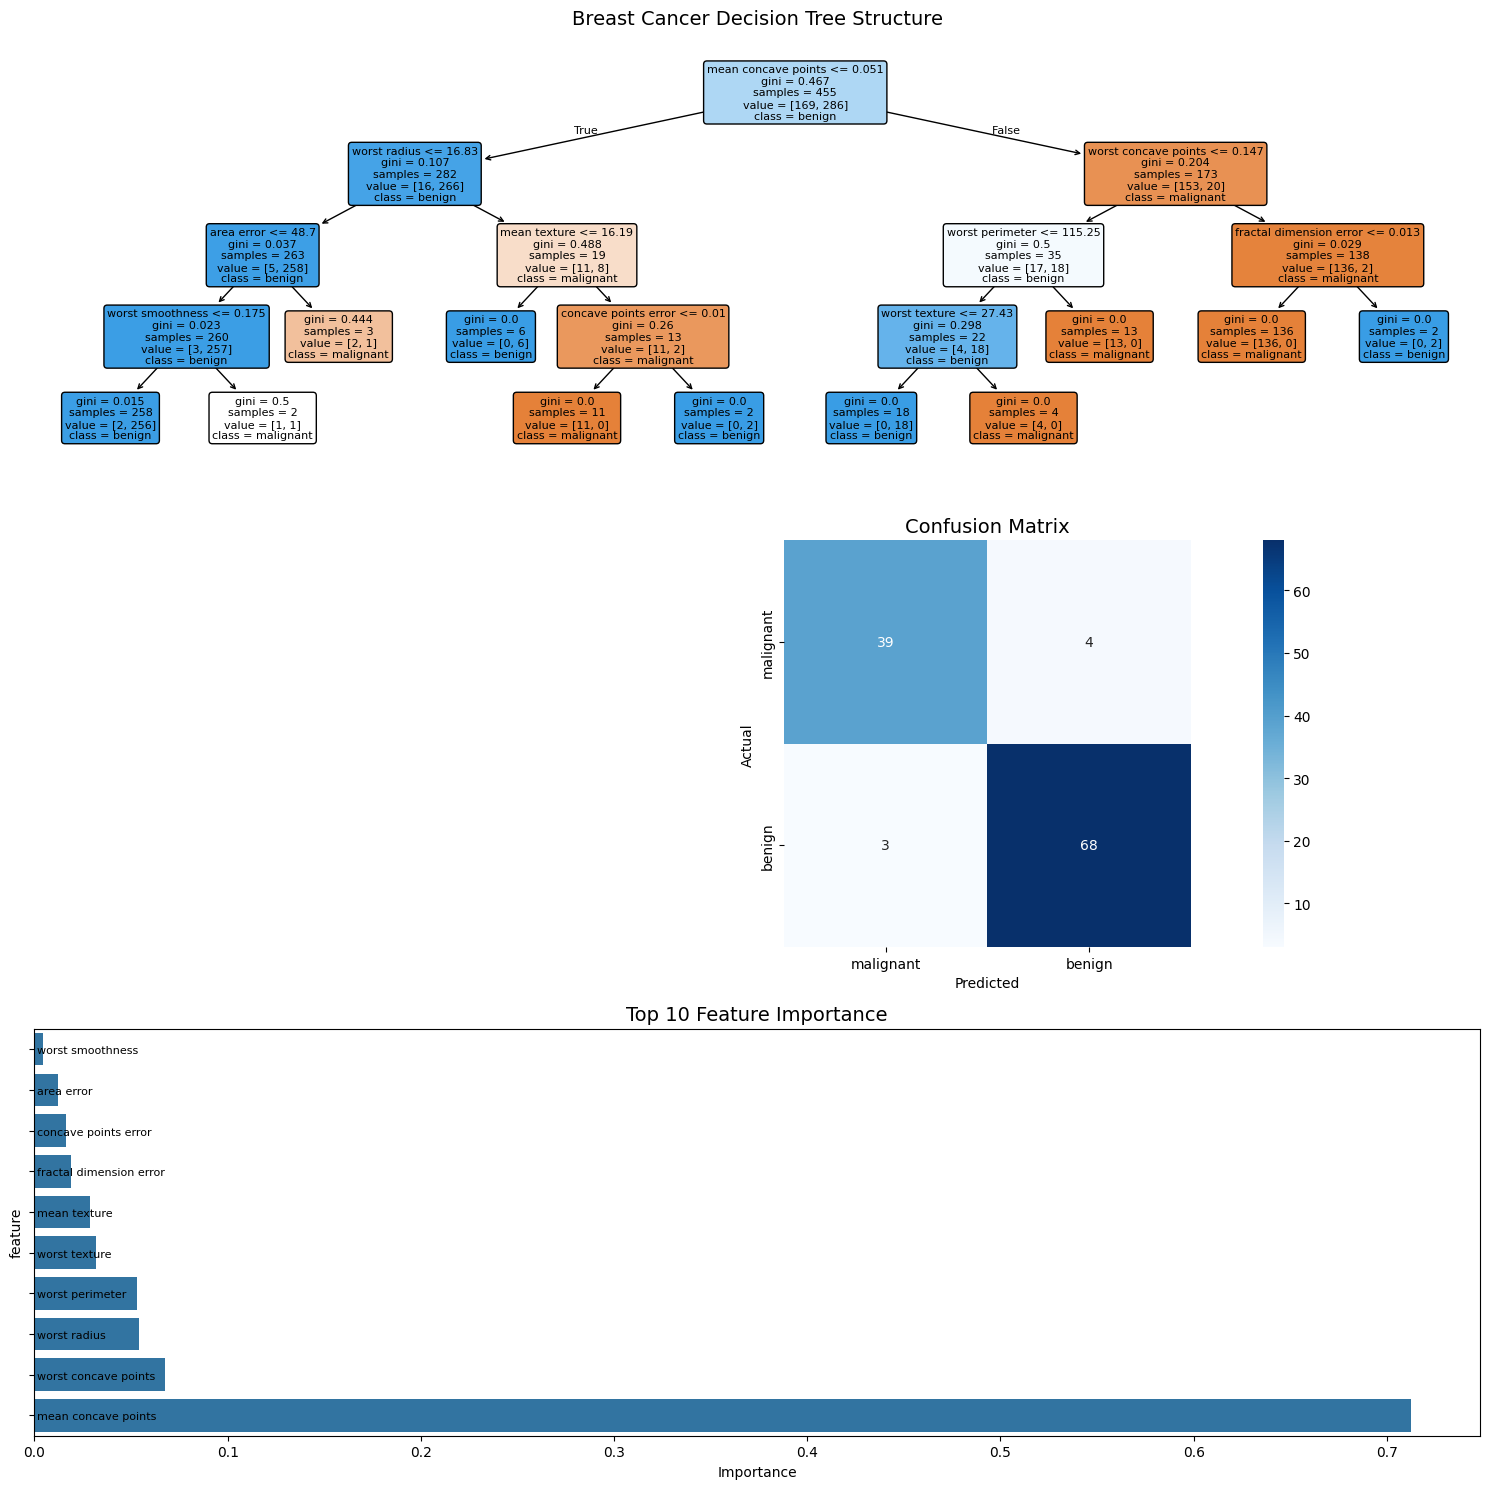

In [4]:
plt.figure(figsize=(15, 15))

plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.05, hspace=0.4)

plt.subplot(3, 1, 1)
plot_tree(dt,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=8)
plt.title('Breast Cancer Decision Tree Structure', pad=20, size=14)

plt.subplot(3, 1, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names,
            square=True)
plt.title('Confusion Matrix', size=14)
plt.xlabel('Predicted')
plt.ylabel('Actual')

ax = plt.subplot(3, 1, 3)
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': dt.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=True).tail(10)
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 10 Feature Importance', size=14)
plt.xlabel('Importance')

ax.tick_params(axis='y', labelsize=8)
ax.set_yticklabels(ax.get_yticklabels(), ha='left')
ax.yaxis.set_tick_params(pad=-5)

plt.tight_layout()
plt.show()

In [5]:
print("\nTree Information:")
print("-" * 50)
print(f"Tree depth: {dt.get_depth()}")
print(f"Number of leaves: {dt.get_n_leaves()}")

print("\nTop 10 Most Important Features:")
print("-" * 50)
top_features = feature_importance.sort_values('importance', ascending=False)
for idx, row in top_features.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

print("\nSample Prediction:")
print("-" * 50)
sample = X_test[0].reshape(1, -1)
prediction = dt.predict(sample)
probabilities = dt.predict_proba(sample)

print(f"Predicted class: {target_names[prediction[0]]}")
print("\nPrediction probabilities:")
for class_name, prob in zip(target_names, probabilities[0]):
    print(f"{class_name}: {prob:.4f}")

print("\nTop 5 feature values for this prediction:")
top_feature_indices = dt.feature_importances_.argsort()[-5:][::-1]
for idx in top_feature_indices:
    print(f"{feature_names[idx]}: {sample[0][idx]:.4f}")


Tree Information:
--------------------------------------------------
Tree depth: 4
Number of leaves: 11

Top 10 Most Important Features:
--------------------------------------------------
mean concave points: 0.7126
worst concave points: 0.0677
worst radius: 0.0539
worst perimeter: 0.0531
worst texture: 0.0318
mean texture: 0.0285
fractal dimension error: 0.0191
concave points error: 0.0164
area error: 0.0123
worst smoothness: 0.0047

Sample Prediction:
--------------------------------------------------
Predicted class: benign

Prediction probabilities:
malignant: 0.0078
benign: 0.9922

Top 5 feature values for this prediction:
mean concave points: 0.0382
worst concave points: 0.1015
worst radius: 14.9700
worst perimeter: 96.0500
worst texture: 24.6400
